## Simulations 

In [1]:
#Read in data (modify this code as needed for where you have stored your data)
import pandas as pd
df=pd.read_csv('transactions-13360000-13365000.csv')
bx_df=pd.read_csv('blocks_13360000_test.csv')

In [2]:
#Creating oracle
import numpy as np
max_fee=df.max_fee_per_gas[100:]
oracle=[np.percentile(max_fee[i-100:i-1],60) for i in range(100,len(max_fee))]

In [8]:
#Creating Values
import math
values=[max_fee[i+100]/oracle[i] for i in range(len(oracle)) if math.isnan(oracle[i])==False]

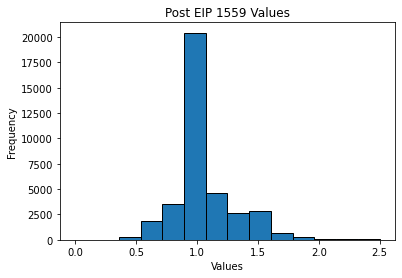

In [144]:
#Plotting Values
import matplotlib.pyplot as plt
bin_list=np.linspace(0,2.5,15)
plt.hist(values,bin_list,ec='black')
plt.title('Post EIP 1559 Values')
plt.xlabel('Values')
plt.ylabel('Frequency');

In [9]:
#Solving for MLE of a gamma distribution
import statistics
import math
a=0.5/(math.log(statistics.mean(values))-statistics.mean([math.log(i) for i in values]))
B=statistics.mean(values)/a
print('The maximum likelihood estimator for alpha is',round(a,4),'and the maximum likelihood estimator for beta is',round(B,4))

The maximum likelihood estimator for alpha is 12.5315 and the maximum likelihood estimator for beta is 0.0867


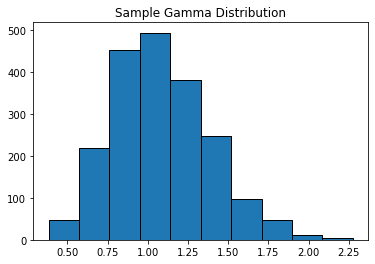

In [149]:
#Sanity Check
test=np.random.gamma(a,B,2000)
plt.hist(test,ec='black')
plt.title('Sample Gamma Distribution');

In [13]:
#Create Simulation Data

#Set up
initial_target_fee=statistics.mean(bx_df.base_fee_per_gas/10**9)
base_fee_simulation=[initial_target_fee]
market_price=[]
d=8

for i in range(100):
    bx_size=int(np.round(np.random.uniform(1,600,1)))
    bids=np.random.gamma(a,B,bx_size)
    base_fee_simulation.append(base_fee_simulation[-1]*(1+((sum(bids)-bx_size)/(d*bx_size))))
    market_price.append(statistics.mean(bids))

for i in range(2000):
    bx_size=int(np.round(np.random.uniform(1,600,1)))
    bids=np.random.gamma(a,B,bx_size)
    target=np.percentile(market_price[-100:],50)
    base_fee_simulation.append(base_fee_simulation[-1]*(1+(statistics.mean(bids)-target)/(d*target)))
    market_price.append(statistics.mean(bids))

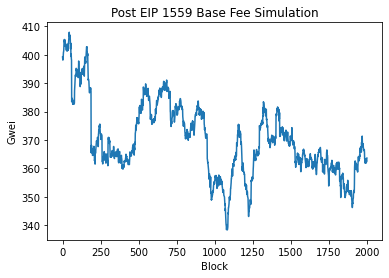

In [14]:
#Plot Simulation
import matplotlib.pyplot as plt
plt.plot(base_fee_simulation[100:]);
plt.title('Post EIP 1559 Base Fee Simulation')
plt.xlabel('Block')
plt.ylabel('Gwei');

In [6]:
import math
math.log(0.582838)

-0.5398460043158456